# Forecasting Movies Revenue Using Machine Learning

## Import Python Libraries

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from IPython.display import display
import ast

## Data Import

In [2]:
df_ratings_small = pd.read_csv('ratings_small.csv')
df_ratings_small.name = 'Ratings small'

df_ratings = pd.read_csv('ratings.csv')
df_ratings.name = 'Ratings'

df_movies_metadata = pd.read_csv('movies_metadata.csv')
#The budget column has 3 rows with non numerical budget. Seems like false data.
df_movies_metadata = df_movies_metadata[df_movies_metadata.budget.apply(lambda x: x.isnumeric())]
df_movies_metadata[["budget", "revenue"]] = df_movies_metadata[["budget", "revenue"]].apply(pd.to_numeric)
df_movies_metadata.name = 'Movies Metadata'

df_links_small = pd.read_csv('links_small.csv')
df_links_small.name = 'Links Small'

df_links = pd.read_csv('links.csv')
df_links.name = 'Links'

df_keywords = pd.read_csv('keywords.csv')
df_keywords.name = 'Keywords'

df_credits = pd.read_csv('credits.csv')
df_credits.name = 'Credits'

dfs = [df_ratings_small,df_ratings,df_movies_metadata,df_links_small,df_links,df_keywords,df_credits]

#When running this code you will get a Warning, not an Error!!!

C:\Users\gfudi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Overview

In [3]:
#import pdb; pdb.set_trace()

for df in dfs:
    print('~~~ ' + df.name + ' ~~~')
    print('Shape: ' + str(df.shape))
    print('Columns: ' + str(list(df.columns.values)))
    print('Top 10 rows')
    display(df.head(10))
    print('Column Types:')
    display(df.dtypes)

~~~ Ratings small ~~~
Shape: (100004, 4)
Columns: ['userId', 'movieId', 'rating', 'timestamp']
Top 10 rows


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


Column Types:


userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

~~~ Ratings ~~~
Shape: (26024289, 4)
Columns: ['userId', 'movieId', 'rating', 'timestamp']
Top 10 rows


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
5,1,1968,4.0,1425942148
6,1,2762,4.5,1425941300
7,1,2918,5.0,1425941593
8,1,2959,4.0,1425941601
9,1,4226,4.0,1425942228


Column Types:


userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

~~~ Movies Metadata ~~~
Shape: (45463, 24)
Columns: ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']
Top 10 rows


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


Column Types:


adult                     object
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

~~~ Links Small ~~~
Shape: (9125, 3)
Columns: ['movieId', 'imdbId', 'tmdbId']
Top 10 rows


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


Column Types:


movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

~~~ Links ~~~
Shape: (45843, 3)
Columns: ['movieId', 'imdbId', 'tmdbId']
Top 10 rows


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


Column Types:


movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

~~~ Keywords ~~~
Shape: (46419, 2)
Columns: ['id', 'keywords']
Top 10 rows


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
5,949,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '..."
6,11860,"[{'id': 90, 'name': 'paris'}, {'id': 380, 'nam..."
7,45325,[]
8,9091,"[{'id': 949, 'name': 'terrorist'}, {'id': 1562..."
9,710,"[{'id': 701, 'name': 'cuba'}, {'id': 769, 'nam..."


Column Types:


id           int64
keywords    object
dtype: object

~~~ Credits ~~~
Shape: (45476, 3)
Columns: ['cast', 'crew', 'id']
Top 10 rows


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
5,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",949
6,"[{'cast_id': 1, 'character': 'Linus Larrabee',...","[{'credit_id': '52fe44959251416c75039da9', 'de...",11860
7,"[{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...","[{'credit_id': '52fe46bdc3a36847f810f797', 'de...",45325
8,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",9091
9,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '52fe426ec3a36847f801e14b', 'de...",710


Column Types:


cast    object
crew    object
id       int64
dtype: object

## Rearranging The Data

We will use only the movies_metadata.csv and credits.csv.
We will join them using the id column.


### Drop Unnecessary Column

In [4]:
col_of_interest_movies_metadata=['id','original_title','release_date','original_language','spoken_languages',
                                 'runtime','genres','adult','production_companies','production_countries','budget',
                                 'revenue']
df_movies_metadata=df_movies_metadata[col_of_interest_movies_metadata]
display(df_movies_metadata.head(1))

col_of_interest_credits=['id','cast','crew']
df_credits=df_credits[col_of_interest_credits]
display(df_credits.head(1))



,id,original_title,release_date,original_language,spoken_languages,runtime,genres,adult,production_companies,production_countries,budget,revenue
0,862,Toy Story,1995-10-30,en,"[{'iso_639_1': 'en', 'name': 'English'}]",81.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",False,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30000000,373554033.0


,id,cast,crew
0,862,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."


### Specifying Data Types

In [5]:
df_movies_metadata_binary_variables = ['adult']
df_movies_metadata_categorical_variables = ['id','original_title','release_date','original_language','spoken_languages',
                         'genres','production_companies','production_countries']
df_movies_metadata_numeric_variables = ['runtime','budget','revenue']
df_credits_categorical_variables=['id','cast','crew']

### Type Converstion

In [6]:
df_movies_metadata[df_movies_metadata_categorical_variables].dtypes

id                      object
original_title          object
release_date            object
original_language       object
spoken_languages        object
genres                  object
production_companies    object
production_countries    object
dtype: object

In [7]:
df_movies_metadata[df_movies_metadata_numeric_variables].dtypes

runtime    float64
budget       int64
revenue    float64
dtype: object

In [8]:
df_credits[df_credits_categorical_variables].dtypes

id       int64
cast    object
crew    object
dtype: object

#### Categorical and Binary Variables to String

In [9]:
for variable in  df_credits_categorical_variables:
    df_credits[variable] = df_credits[variable].astype(np.str)
df_credits[df_credits_categorical_variables].dtypes



id      object
cast    object
crew    object
dtype: object

#### Numeric Variables to Float

In [10]:
dfs[2]['budget']= df_movies_metadata['budget'].astype(np.float)
df_movies_metadata[df_movies_metadata_numeric_variables].dtypes
dfs[2]['budget'].dtypes

dtype('float64')

### Join The Two Dataframes

In [11]:
display(df_movies_metadata.shape)
display(df_movies_metadata.id.nunique())
display(df_credits.shape)
display(df_credits.id.nunique())

(45463, 12)

45433

(45476, 3)

45432

##### mmmmm.... we have duplicates! lets look at them

In [12]:
display(pd.concat(g for _, g in df_movies_metadata.groupby("id") if len(g) > 1))
display(pd.concat(g for _, g in df_credits.groupby("id") if len(g) > 1))


,id,original_title,release_date,original_language,spoken_languages,runtime,genres,adult,production_companies,production_countries,budget,revenue
676,105045,Das Versprechen,1995-02-16,de,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",115.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",False,"[{'name': 'Studio Babelsberg', 'id': 264}, {'n...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",0,0.0
1465,105045,Das Versprechen,1995-02-16,de,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",115.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",False,"[{'name': 'Studio Babelsberg', 'id': 264}, {'n...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",0,0.0
4114,10991,Pokémon 3: The Movie,2000-07-08,ja,"[{'iso_639_1': 'en', 'name': 'English'}]",93.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",False,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': '4...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",16000000,68411275.0
44821,10991,Pokémon 3: The Movie,2000-07-08,ja,"[{'iso_639_1': 'en', 'name': 'English'}]",93.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",False,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': '4...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",16000000,68411275.0
5710,109962,Rich and Famous,1981-09-23,en,"[{'iso_639_1': 'en', 'name': 'English'}]",115.0,"[{'id': 18, 'name': 'Drama'}]",False,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...","[{'iso_3166_1': 'US', 'name': 'United States o...",0,0.0
20899,109962,Rich and Famous,1981-09-23,en,"[{'iso_639_1': 'en', 'name': 'English'}]",115.0,"[{'id': 18, 'name': 'Drama'}]",False,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...","[{'iso_3166_1': 'US', 'name': 'United States o...",0,0.0
4356,110428,Camille Claudel 1915,2013-03-13,fr,"[{'iso_639_1': 'fr', 'name': 'Français'}]",95.0,"[{'id': 18, 'name': 'Drama'}]",False,"[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...","[{'iso_3166_1': 'FR', 'name': 'France'}]",3512454,115860.0
23534,110428,Camille Claudel 1915,2013-03-13,fr,"[{'iso_639_1': 'fr', 'name': 'Français'}]",95.0,"[{'id': 18, 'name': 'Drama'}]",False,"[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...","[{'iso_3166_1': 'FR', 'name': 'France'}]",3512454,115860.0
14012,11115,Deal,2008-01-29,en,"[{'iso_639_1': 'en', 'name': 'English'}]",85.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",False,"[{'name': 'Andertainment Group', 'id': 2634}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",0,0.0
24844,11115,Deal,2008-01-29,en,"[{'iso_639_1': 'en', 'name': 'English'}]",85.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",False,"[{'name': 'Andertainment Group', 'id': 2634}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",0,0.0


,id,cast,crew
676,105045,"[{'cast_id': 5, 'character': 'Sophie II', 'cre...","[{'credit_id': '52fe4a44c3a36847f81c463f', 'de..."
1465,105045,"[{'cast_id': 5, 'character': 'Sophie II', 'cre...","[{'credit_id': '52fe4a44c3a36847f81c463f', 'de..."
4114,10991,"[{'cast_id': 1, 'character': 'Ash Ketchum', 'c...","[{'credit_id': '52fe43de9251416c750213ff', 'de..."
44831,10991,"[{'cast_id': 1, 'character': 'Ash Ketchum', 'c...","[{'credit_id': '52fe43de9251416c750213ff', 'de..."
5710,109962,"[{'cast_id': 1, 'character': 'Liz Hamilton', '...","[{'credit_id': '52fe4ac8c3a36847f81e1445', 'de..."
20898,109962,"[{'cast_id': 1, 'character': 'Liz Hamilton', '...","[{'credit_id': '52fe4ac8c3a36847f81e1445', 'de..."
4356,110428,"[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'credit_id': '52fe4ad6c3a36847f81e461b', 'de..."
23533,110428,"[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'credit_id': '577ed5389251416976004432', 'de..."
14012,11115,"[{'cast_id': 13, 'character': 'Tommy Vinson', ...","[{'credit_id': '52fe43fb9251416c75024ff5', 'de..."
24843,11115,"[{'cast_id': 13, 'character': 'Tommy Vinson', ...","[{'credit_id': '52fe43fb9251416c75024ff5', 'de..."


##### ok seems legit... lets stay with only one copy

In [13]:
df_movies_metadata=df_movies_metadata.drop_duplicates(subset='id')
display(df_movies_metadata.shape)
display(df_movies_metadata.id.nunique())

df_credits=df_credits.drop_duplicates(subset='id')
display(df_credits.shape)
display(df_credits.id.nunique())

(45433, 12)

45433

(45432, 3)

45432

In [14]:
df =pd.merge(df_movies_metadata,df_credits, on='id',how='left')
display(df.head(1))
display(df.shape)

,id,original_title,release_date,original_language,spoken_languages,runtime,genres,adult,production_companies,production_countries,budget,revenue,cast,crew
0,862,Toy Story,1995-10-30,en,"[{'iso_639_1': 'en', 'name': 'English'}]",81.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",False,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30000000,373554033.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."


(45433, 14)

### Extracting useful information

lets create date columns

In [15]:
df['release_year']=pd.to_datetime(df['release_date']).apply(lambda x: x.year)
df['release_month']=pd.to_datetime(df['release_date']).apply(lambda x: x.month)
df['release_day']=pd.to_datetime(df['release_date']).apply(lambda x: x.day)
display(df.head(1))

,id,original_title,release_date,original_language,spoken_languages,runtime,genres,adult,production_companies,production_countries,budget,revenue,cast,crew,release_year,release_month,release_day
0,862,Toy Story,1995-10-30,en,"[{'iso_639_1': 'en', 'name': 'English'}]",81.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",False,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30000000,373554033.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995.0,10.0,30.0


lets extract the values from the categorical columns

In [16]:
def get_values(data_str):
    if isinstance(data_str, float):
        pass
    else:
        values = []
        data = ast.literal_eval(data_str)
        if isinstance(data, list) and len(data)>0:
            for k_v in data:
                values.append(k_v['name'])
            return values
        else:
            return None



In [17]:
need_to_be_extracted=['genres', 'production_companies', 'production_countries', 'spoken_languages','cast']
df[need_to_be_extracted] = df[need_to_be_extracted].applymap(get_values)
display(df.head(1))

,id,original_title,release_date,original_language,spoken_languages,runtime,genres,adult,production_companies,production_countries,budget,revenue,cast,crew,release_year,release_month,release_day
0,862,Toy Story,1995-10-30,en,[English],81.0,"[Animation, Comedy, Family]",False,[Pixar Animation Studios],[United States of America],30000000,373554033.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995.0,10.0,30.0


In [18]:
def get_director(data_str):
    if isinstance(data_str, float):
        pass
    else:
        values = []
        data = ast.literal_eval(data_str)
        if isinstance(data, list) and len(data)>0:
            for k_v in data:
                if('job' in k_v):
                    if(k_v['job']=='Director'):
                        values.append(k_v['name'])
            return values
        else:
            return None

In [25]:
def counting_values(df, column):
    value_count = {}
    for row in df[column].dropna():
        if len(row) > 0:
            for key in row:
                if key in value_count:
                    value_count[key] += 1
                else:
                    value_count[key] = 1
        else:
            pass
    return value_count

20

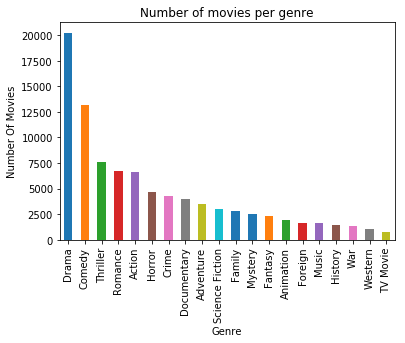

In [81]:
genres_count = pd.Series(counting_values(df, 'genres'))
genres_count.sort_values(ascending = False).head(20).plot(kind = 'bar')
display(len(genres_count))
plt.title('Number of movies per genre')
plt.xlabel('Genre')
plt.ylabel('Number Of Movies')
plt.show()

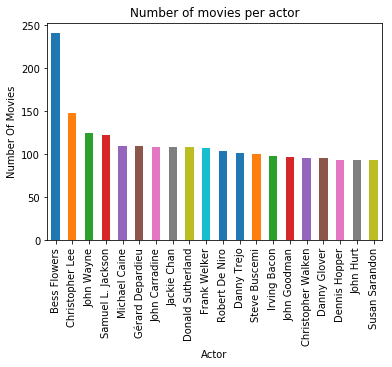

In [87]:
actor_movies_count = pd.Series(counting_values(df, 'cast'))
actor_movies_count.sort_values(ascending = False).head(20).plot(kind = 'bar')
#display(len(actor_movies_count))
plt.title('Number of movies per actor')
plt.xlabel('Actor')
plt.ylabel('Number Of Movies')
plt.show()

135

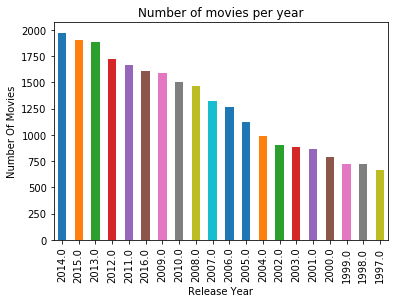

In [85]:
number_of_movies_by_year=df['release_year'].value_counts()
number_of_movies_by_year.head(20).plot.bar()
plt.title('Number of movies per year')
plt.xlabel('Release Year')
plt.ylabel('Number Of Movies')
display(len(number_of_movies_by_year))
plt.show()


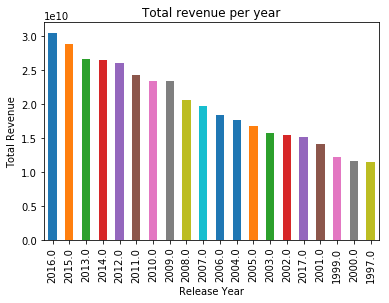

In [88]:
revenue_per_year=df.groupby(["release_year"]).sum().sort_values("revenue",ascending=False).revenue
revenue_per_year.head(20).plot.bar()
plt.title('Total revenue per year')
plt.xlabel('Release Year')
plt.ylabel('Total Revenue')
plt.show()

In [91]:
cols=['revenue','budget','runtime',]
df[cols] = df[cols].replace({ 0:np.nan})
np.sum(df.isnull())

id                          0
original_title              0
release_date               87
original_language          11
spoken_languages         3830
runtime                  1818
genres                   2442
adult                       0
production_companies    11871
production_countries     6282
budget                  36553
revenue                 38035
cast                     2415
crew                        1
release_year               87
release_month              87
release_day                87
dtype: int64

In [95]:
np.sum(df_credits.replace({ '[]':np.nan}).isnull())

id         0
cast    2414
crew     771
dtype: int64

## Data Statistics

In [ ]:
for df in dfs:
    print('~~~ ' + df.name + ' ~~~')
    print("Minimum value:")
    display(df.min(axis=0))
    print("Maximum value:")
    display(df.max(axis=0))
    print("Mean:")
    display(df.mean(axis=0))
    print("Std:")
    display(df.std(axis=0))
    print("Median:")
    display(df.median(axis=0))

~~~ Ratings small ~~~
Minimum value:


userId               1.0
movieId              1.0
rating               0.5
timestamp    789652009.0
dtype: float64

Maximum value:


userId       6.710000e+02
movieId      1.639490e+05
rating       5.000000e+00
timestamp    1.476641e+09
dtype: float64

Mean:


userId       3.470113e+02
movieId      1.254866e+04
rating       3.543608e+00
timestamp    1.129639e+09
dtype: float64

Std:


userId       1.951638e+02
movieId      2.636920e+04
rating       1.058064e+00
timestamp    1.916858e+08
dtype: float64

Median:


userId       3.670000e+02
movieId      2.406500e+03
rating       4.000000e+00
timestamp    1.110422e+09
dtype: float64

~~~ Ratings ~~~
Minimum value:


userId               1.0
movieId              1.0
rating               0.5
timestamp    789652004.0
dtype: float64

Maximum value:


userId       2.708960e+05
movieId      1.762750e+05
rating       5.000000e+00
timestamp    1.501830e+09
dtype: float64

Mean:


userId       1.350371e+05
movieId      1.584911e+04
rating       3.528090e+00
timestamp    1.171258e+09
dtype: float64

Std:


userId       7.817620e+04
movieId      3.108526e+04
rating       1.065443e+00
timestamp    2.052889e+08
dtype: float64

Median:


userId       1.351630e+05
movieId      2.583000e+03
rating       3.500000e+00
timestamp    1.151716e+09
dtype: float64

~~~ Movies Metadata ~~~
Minimum value:


adult                             False
budget                                0
genres                               []
id                                  100
original_title    !Women Art Revolution
revenue                               0
runtime                               0
video                             False
vote_average                          0
vote_count                            0
dtype: object

Maximum value:


adult                                            True
budget                                        3.8e+08
genres            [{'id': 99, 'name': 'Documentary'}]
id                                               9999
original_title                     ＳＭガールズ セイバーマリオネットＲ
revenue                                   2.78797e+09
runtime                                          1256
video                                            True
vote_average                                       10
vote_count                                      14075
dtype: object

Mean:


budget          4.224579e+06
revenue         1.120935e+07
runtime         9.412820e+01
vote_average    5.618207e+00
vote_count      1.098973e+02
dtype: float64

Std:


budget          1.742413e+07
revenue         6.433225e+07
runtime         3.840781e+01
vote_average    1.924216e+00
vote_count      4.913104e+02
dtype: float64

Median:


budget           0.0
revenue          0.0
runtime         95.0
vote_average     6.0
vote_count      10.0
dtype: float64

~~~ Links Small ~~~
Minimum value:


movieId      1.0
imdbId     417.0
tmdbId       2.0
dtype: float64

Maximum value:


movieId     164979.0
imdbId     5794766.0
tmdbId      416437.0
dtype: float64

Mean:


movieId     31123.291836
imdbId     479824.392329
tmdbId      39104.545544
dtype: float64

Std:


movieId     40782.633604
imdbId     743177.360844
tmdbId      62814.519801
dtype: float64

Median:


movieId      6290.0
imdbId     119778.0
tmdbId      15852.0
dtype: float64

~~~ Links ~~~
Minimum value:


movieId    1.0
imdbId     1.0
tmdbId     2.0
dtype: float64

Maximum value:


movieId     176279.0
imdbId     7158814.0
tmdbId      469172.0
dtype: float64

Mean:


movieId     96578.775626
imdbId     993708.022032
tmdbId     108661.382847
dtype: float64

Std:


movieId    5.721686e+04
imdbId     1.361924e+06
tmdbId     1.126660e+05
dtype: float64

Median:


movieId    108799.0
imdbId     283991.0
tmdbId      60178.0
dtype: float64

~~~ Keywords ~~~
Minimum value:


id           2
keywords    []
dtype: object

Maximum value:


id                                                     469172
keywords    [{'id': 9991, 'name': 'dress'}, {'id': 15058, ...
dtype: object

Mean:


## Missing Values

In [ ]:
for df in dfs:
    missing_values_count = df.isnull().sum()
    missing_values_count = missing_values_count[missing_values_count>0]
    
    # If there are missing values
    if(missing_values_count.size>0):
        print('~~~ ' + df.name + ' ~~~')
        print('Columns with missing values: ')
        display(df.columns[df.isnull().any()].tolist())
        print('Missing values count: ')
        display(missing_values_count)

## Movie Database - Missing budget and revenue

In [ ]:
print('Number of movies: ' + str(df_movies_metadata.shape[0]))
print('Number of movies with missing budge: ' + str(df_movies_metadata[(df_movies_metadata["budget"] == 0)].shape[0]))
print('Number of movies with missing revenue: ' + str(df_movies_metadata[(df_movies_metadata["revenue"] == 0)].shape[0]))

#Only keep movies with existing budget / revenue
df_movies_metadata = df_movies_metadata[(df_movies_metadata["budget"] > 0)]
df_movies_metadata = df_movies_metadata[(df_movies_metadata["revenue"] > 0)]

pd.options.display.float_format = '{:,}'.format

print('Budget distribution:')
#display(pd.qcut(df_movies_metadata["budget"],10).value_counts())
display(df_movies_metadata.hist(column='budget',log=True))
plt.show()
plt.close()
print('Revenue distribution:')
display(df_movies_metadata.hist(column='revenue',log=True))
plt.show()
plt.close()
print('runtime distribution:')
display(df_movies_metadata.hist(column='runtime',log=True))
plt.show()
plt.close()

# Correlation

In [ ]:
columns_for_corr = ['budget', 'genres', 'original_language', 'release_date', 'runtime']
for col in columns_for_corr:
    if (np.issubdtype(df_movies_metadata[col].dtype, np.number)):
        print("%s is numeric and is correlation with revenue is: %f" % (col, df_movies_metadata['revenue'].corr(df_movies_metadata[col])))
        
    else:
        print("%s isn't numeric" % (col))  
#i=1
#for field in df_movies_metadata['genres']:
#    print("field num %d" % (i))
#    for gen in field:
#        display("".join(np.array(gen.splitlines()).T.tolist()))
#    i+=1